In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [12]:
n_inputs = 8
n_outputs = 1

dataset = np.loadtxt('./diabetes.csv', delimiter=',', skiprows=1)
x = dataset[:,0:n_inputs]
y = dataset[:,n_inputs-1+n_outputs]

print("Number of instances in the dataset: ", x.shape[0])

Number of instances in the dataset:  768


In [22]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y,test_size=0.4, random_state=79)

scaler = MinMaxScaler()
scaler.fit(x_train)
xs_train = scaler.transform(x_train)
xs_valid = scaler.transform(x_valid)

In [25]:
# Convert to torch tensors:
xs_train = torch.tensor(xs_train, dtype=torch.float32)
xs_valid = torch.tensor(xs_valid, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1) 
y_valid = torch.tensor(y_valid, dtype=torch.float32).reshape(-1, 1)

/var/folders/2r/b60vp1dj2zn0rg5yg_gyy0zr0000gq/T/ipykernel_27743/3253411995.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xs_train = torch.tensor(xs_train, dtype=torch.float32)
/var/folders/2r/b60vp1dj2zn0rg5yg_gyy0zr0000gq/T/ipykernel_27743/3253411995.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xs_valid = torch.tensor(xs_valid, dtype=torch.float32)
/var/folders/2r/b60vp1dj2zn0rg5yg_gyy0zr0000gq/T/ipykernel_27743/3253411995.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float3

In [27]:
model = nn.Sequential(
    nn.Linear(8, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 1),
    nn.Sigmoid()
)

In [28]:
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

n_epochs = 100
batch_size = 100

In [38]:
arr_losses_train = []
arr_losses_valid = []
        
for epoch in range (n_epochs) :
    for i in range(0, len(x), batch_size):
        # Training:
        xs_train_batch = xs_train[i:i+batch_size]
        y_train_batch_pred = model(xs_train_batch)
        y_train_batch = y_train[i:i+batch_size]
        # Compare loss:
        loss = loss_fn(y_train_batch_pred, y_train_batch)
        # Get gradients:
        optimizer.zero_grad()
        # Loss and optimization:
        loss.backward()
        optimizer.step()
    # Get loss for validation:
    y_train_pred = model(xs_train) 
    y_valid_pred = model(xs_valid)
    loss_train = loss_fn(y_train_pred, y_train)
    loss_valid = loss_fn(y_valid_pred, y_valid)
    # Store:
    arr_losses_train.append(loss_train.item())
    arr_losses_valid.append(loss_valid.item())
    # Print epoch info:
    if epoch%10 == 0:
        print(f'Epoch {epoch}: Train loss: {loss_train}. Valid loss: {loss_valid}')

Epoch 0: Train loss: 0.6544050574302673. Valid loss: 0.6495838165283203
Epoch 10: Train loss: 0.6062395572662354. Valid loss: 0.601437509059906
Epoch 20: Train loss: 0.5567287802696228. Valid loss: 0.5493844151496887
Epoch 30: Train loss: 0.5223312377929688. Valid loss: 0.5073701739311218
Epoch 40: Train loss: 0.5005011558532715. Valid loss: 0.47753384709358215
Epoch 50: Train loss: 0.4868774116039276. Valid loss: 0.4582025110721588
Epoch 60: Train loss: 0.4780066907405853. Valid loss: 0.446380615234375
Epoch 70: Train loss: 0.471665620803833. Valid loss: 0.4390875995159149
Epoch 80: Train loss: 0.46640512347221375. Valid loss: 0.4346369504928589
Epoch 90: Train loss: 0.46173274517059326. Valid loss: 0.43160271644592285


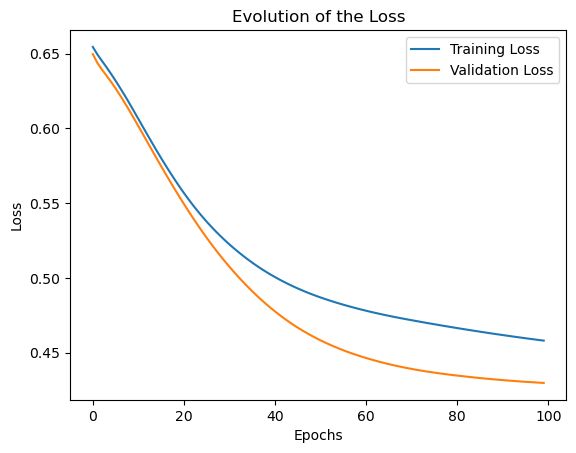

In [40]:
plt.plot(arr_losses_train, label='Training Loss') 
plt.plot(arr_losses_valid, label='Validation Loss')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Evolution of the Loss')
plt.legend()

In [46]:
# Compute accuracy (no_ grad is optional)
with torch.no_grad():
    y_train_pred = model(xs_train)
    y_valid_pred = model(xs_valid)
accuracy_train = (y_train_pred.round() == y_train).float().mean()
accuracy_valid = (y_valid_pred.round() == y_valid).float().mean()

print(f"Train Accuracy {accuracy_train}") 
print(f"Valid Accuracy {accuracy_valid}")


Train Accuracy 0.791304349899292
Valid Accuracy 0.798701286315918
